<a href="https://colab.research.google.com/github/Jayadeep30/machine-learning-projects/blob/main/flood_prediction(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mount the drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#import necessary libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your flood prediction dataset

In [20]:
data=pd.read_csv('/content/drive/MyDrive/flood.csv')
print(data.head())

   MonsoonIntensity  TopographyDrainage  ...  PoliticalFactors  FloodProbability
0                 3                   8  ...                 6             0.450
1                 8                   4  ...                 3             0.475
2                 3                  10  ...                 6             0.515
3                 4                   4  ...                10             0.520
4                 3                   7  ...                 4             0.475

[5 rows x 21 columns]


#chesck for missing values

In [17]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print(f"Total missing values: {missing_values.sum()}")

Missing values in each column:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
No missing values in the dataset.


#check for duplicated rows

In [19]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")

Number of duplicated rows: 0


# Define the features (X) and target (y)

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.head())
print(y.head())

   MonsoonIntensity  TopographyDrainage  ...  InadequatePlanning  PoliticalFactors
0                 3                   8  ...                   2                 6
1                 8                   4  ...                   1                 3
2                 3                  10  ...                   3                 6
3                 4                   4  ...                   6                10
4                 3                   7  ...                   3                 4

[5 rows x 20 columns]
0    0.450
1    0.475
2    0.515
3    0.520
4    0.475
Name: FloodProbability, dtype: float64



# Split the dataset into training and test sets

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 20)
(10000, 20)
(40000,)
(10000,)


# Initialize the XGBoost Regressor

In [24]:
xgboost_model=XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


# Train the model


# Make predictions on the test set

In [25]:
xgboost_model.fit(X_train,y_train)
y_pred=xgboost_model.predict(X_test)

# Evaluate the model

In [26]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 0.0002255418633008898
R-squared (R2 Score): 0.909442241100562


#plot the graph

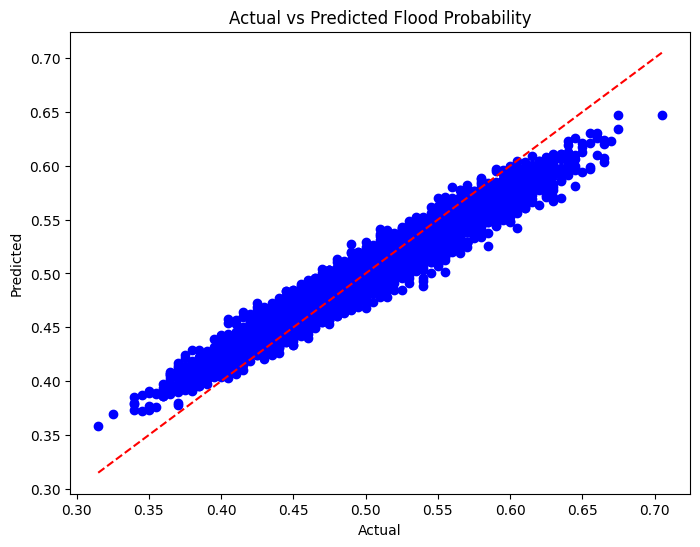

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Flood Probability')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
